In [1]:
import warnings; warnings.filterwarnings("ignore")
import h5py,cv2,os
import pandas as pd,numpy as np,pylab as plt
import keras as ks,tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam,Nadam
from keras.models import Sequential,load_model,Model
from keras.layers import Input,Activation,Dense,LSTM
from keras.layers import Flatten,Dropout,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import LeakyReLU,PReLU
np.set_printoptions(precision=8); rn=np.random.randint(5000)
from keras import __version__
print('keras version:',__version__)
print('tensorflow version:',tf.__version__)

keras version: 2.10.0
tensorflow version: 2.10.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


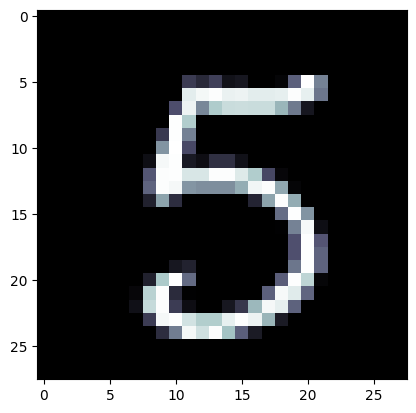

(42000, 784)

In [2]:
df_train = pd.read_csv('./data/train.csv')
print(df_train.info())
id_images=[f"pixel{pixel_no}" for pixel_no in range(0,784)]
train_images=np.array(df_train[id_images])
train_images=train_images.astype('float32').reshape(-1,784)
plt.imshow(np.squeeze(train_images[rn].reshape(28,28)),
          cmap=plt.cm.bone);plt.show()
train_images.shape

In [3]:
df_test = pd.read_csv('./data/test.csv')
print(df_test.info())
test_images=np.array(df_test[id_images])
test_images=test_images.astype('float32').reshape(-1,784)
test_images.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


(28000, 784)

In [4]:
def preprocess(data):
    data=data.astype('float32').reshape(-1,784)
    data/=255.0
    return data

def display_images(data):
    plt.figure(figsize=(10,10))
    len_img = data.shape[0]
    print('images in dataset:',len_img)
    
    for i in range(len_img):
        plt.subplot(5,5,i+1)
        plt.xticks([]);plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(data[i].reshape(28,28)),
                  cmap=plt.cm.bone)
    plt.show()

images in dataset: 15


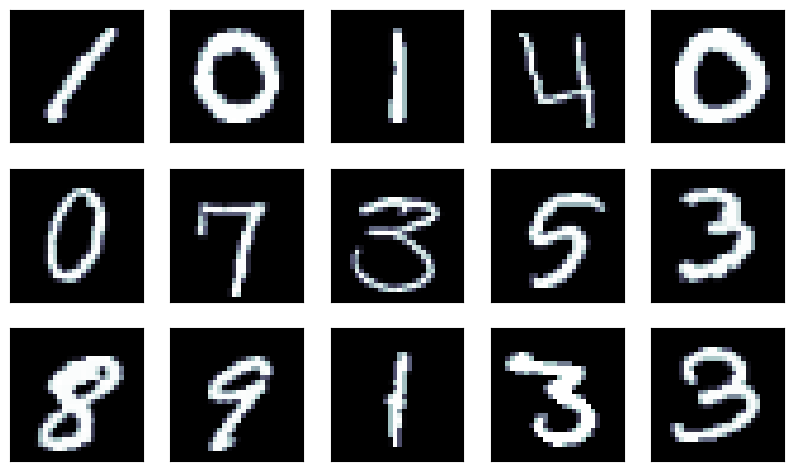

In [5]:
X_train_real=preprocess(train_images)
X_test_real =preprocess(test_images)
display_images(X_train_real[:15])

In [14]:
def trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable
    model.trainable = trainable
    return model

def simple_GAN(sample_size, 
               g_hidden_size, 
               d_hidden_size, 
               leaky_alpha, 
               g_learning_rate,
               d_learning_rate):    
    ks.backend.clear_session()    
    generator=Sequential([Dense(g_hidden_size,input_shape=(sample_size,)),
                          LeakyReLU(alpha=leaky_alpha),
                          Dense(784),Activation('tanh')], 
                         name='generator')    
    discriminator=Sequential([Dense(d_hidden_size,input_shape=(784,)),
                              LeakyReLU(alpha=leaky_alpha),
                              Dense(1),Activation('sigmoid')], 
                             name='discriminator')        
    gan=Sequential([generator,discriminator])    
    discriminator.compile(optimizer=Adam(lr=d_learning_rate), 
                          loss='binary_crossentropy')
    gan.compile(optimizer=Adam(lr=g_learning_rate), 
                loss='binary_crossentropy')   
    return gan,discriminator,generator

In [20]:
sample_size     = 100
g_hidden_size   = 128
d_hidden_size   = 128
leaky_alpha     = 0.01
g_lr            = 0.0001
d_lr            = 0.0001
epochs          = 100
batch_size      = 64
eval_size       = 16
smooth          = 0.1

In [22]:
def real_fake_labels(size):
    return np.ones([size,1]),np.zeros([size,1])
y_real5,y_fake5=real_fake_labels(5)
print('Real\n',list(y_real5),'\nFake\n',list(y_fake5))
y_train_real,y_train_fake=real_fake_labels(batch_size)
y_valid_real,y_valid_fake=real_fake_labels(eval_size)
gan,generator,discriminator= simple_GAN(sample_size,g_hidden_size,d_hidden_size, leaky_alpha,g_lr,d_lr)

Real
 [array([1.]), array([1.]), array([1.]), array([1.]), array([1.])] 
Fake
 [array([0.]), array([0.]), array([0.]), array([0.]), array([0.])]


In [23]:
def latent_samples(sample_size, latent_dim):
    return np.random.normal(loc=0, scale=1, size=(sample_size, latent_dim))

Epoch: 10/100 | Discriminator Loss: 1.2851 | Generator Loss: 0.4486 | DL > GL: True
1/1 [==============================] - 0s 25ms/step
images in dataset: 25


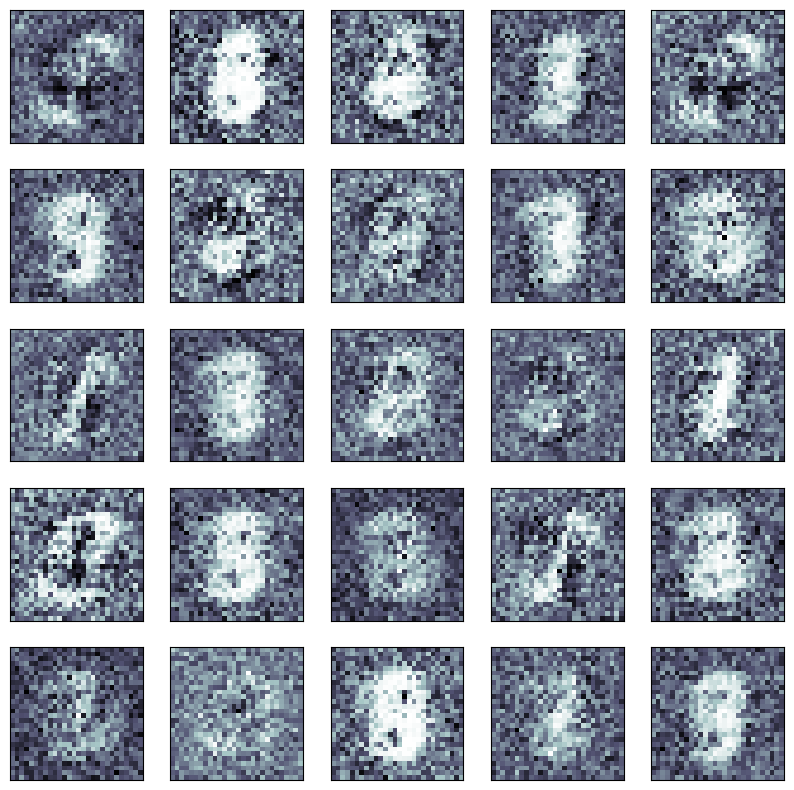

Epoch: 20/100 | Discriminator Loss: 1.4622 | Generator Loss: 0.4031 | DL > GL: True
1/1 [==============================] - 0s 17ms/step
images in dataset: 25


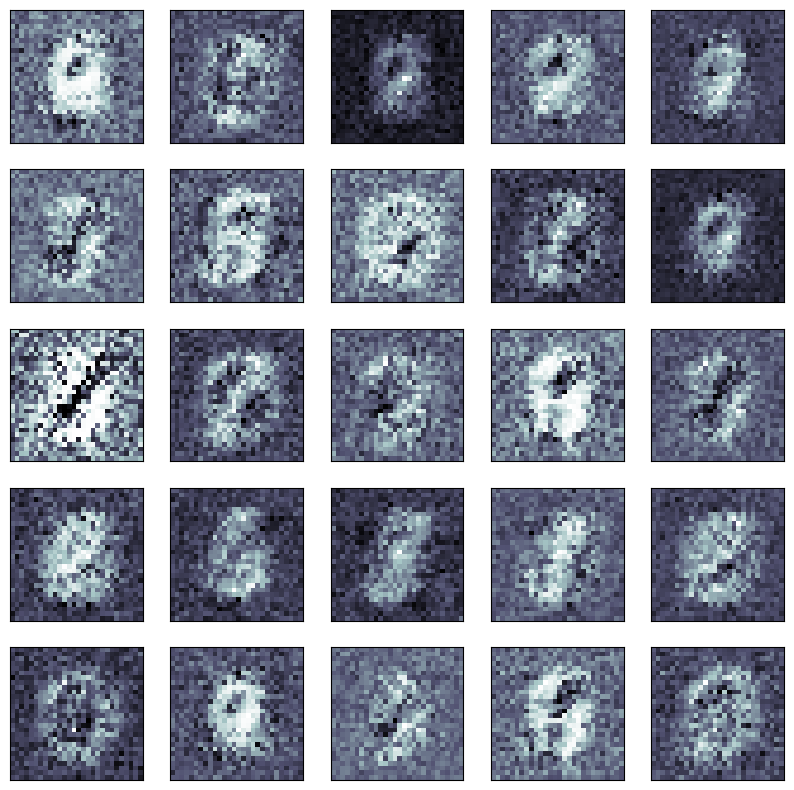

Epoch: 30/100 | Discriminator Loss: 1.6009 | Generator Loss: 0.3478 | DL > GL: True
1/1 [==============================] - 0s 10ms/step
images in dataset: 25


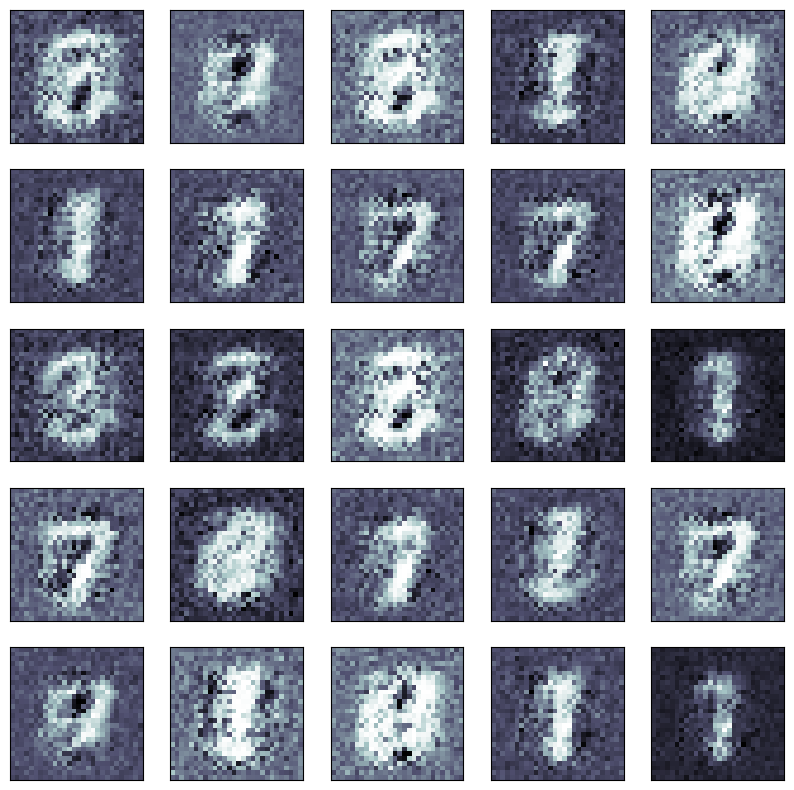

Epoch: 40/100 | Discriminator Loss: 1.6238 | Generator Loss: 0.3254 | DL > GL: True
1/1 [==============================] - 0s 14ms/step
images in dataset: 25


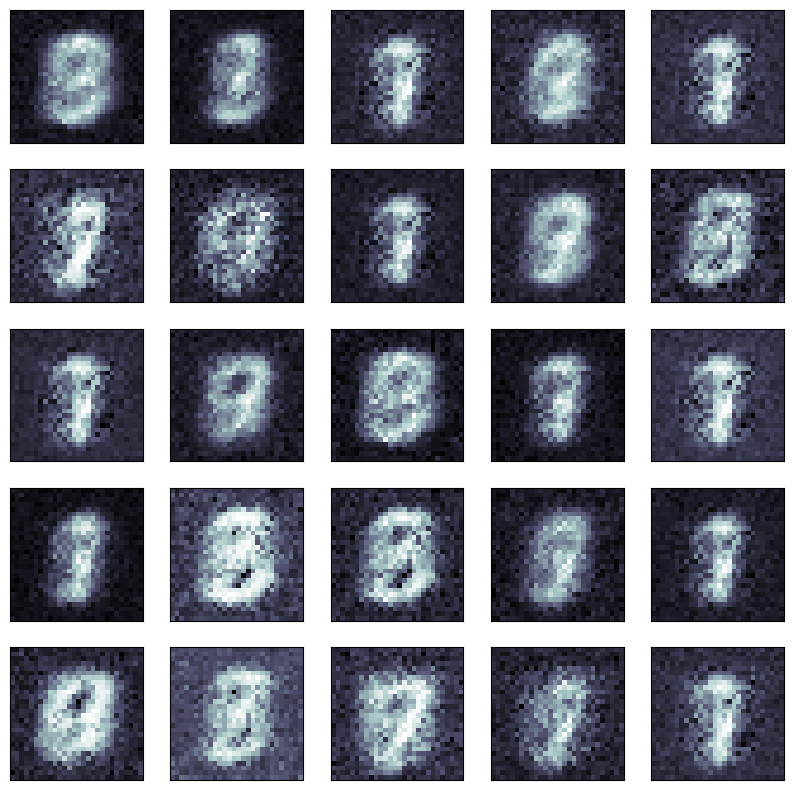

Epoch: 50/100 | Discriminator Loss: 1.7147 | Generator Loss: 0.2762 | DL > GL: True
1/1 [==============================] - 0s 6ms/step
images in dataset: 25


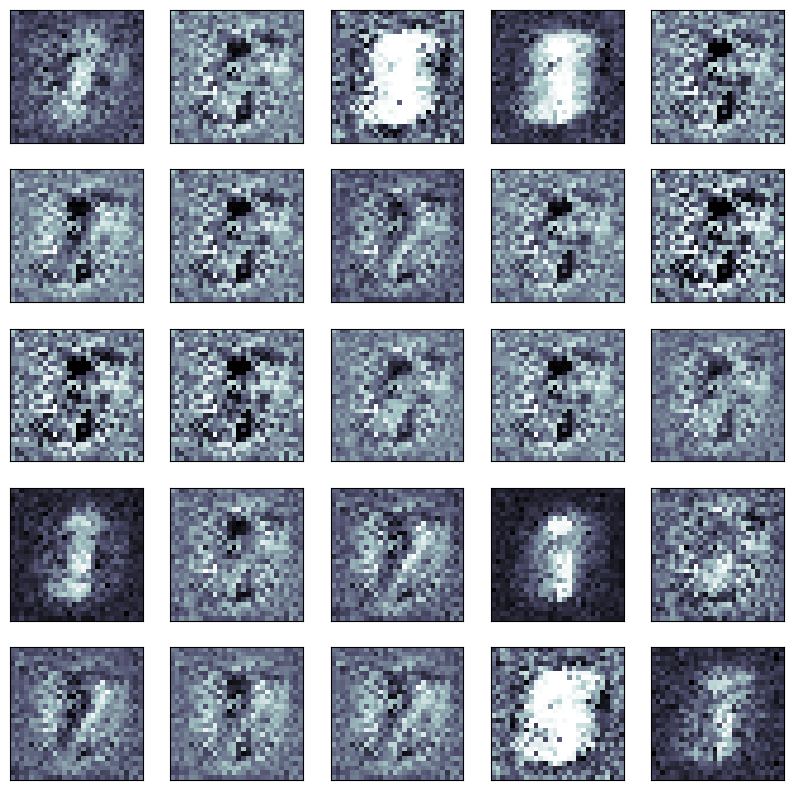

Epoch: 60/100 | Discriminator Loss: 1.6968 | Generator Loss: 0.2944 | DL > GL: True
1/1 [==============================] - 0s 10ms/step
images in dataset: 25


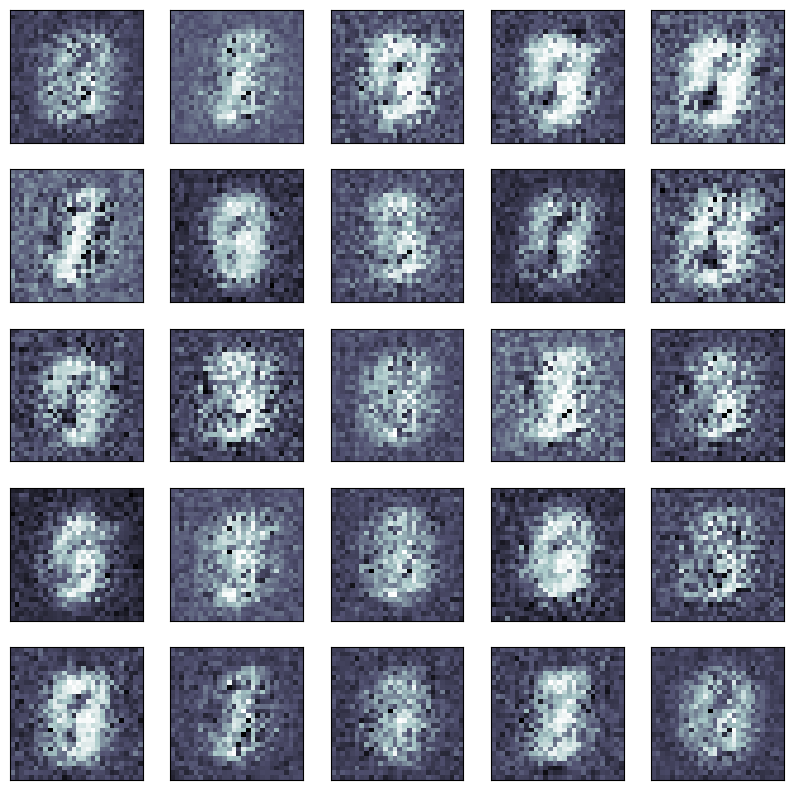

Epoch: 70/100 | Discriminator Loss: 1.6011 | Generator Loss: 0.3209 | DL > GL: True
1/1 [==============================] - 0s 5ms/step
images in dataset: 25


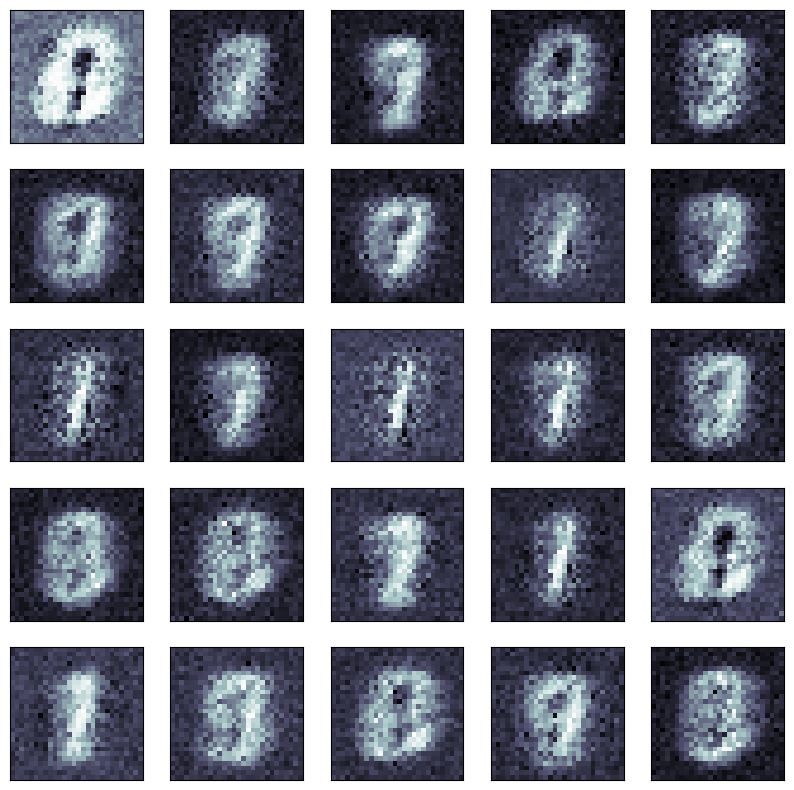

Epoch: 80/100 | Discriminator Loss: 1.5393 | Generator Loss: 0.3520 | DL > GL: True
1/1 [==============================] - 0s 6ms/step
images in dataset: 25


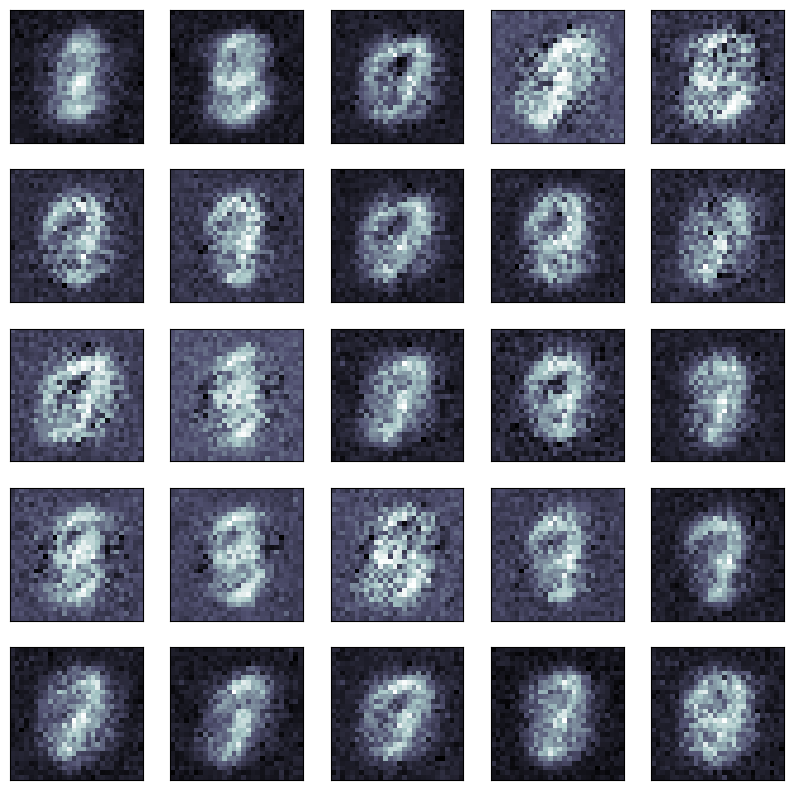

Epoch: 90/100 | Discriminator Loss: 2.0276 | Generator Loss: 0.2031 | DL > GL: True
1/1 [==============================] - 0s 10ms/step
images in dataset: 25


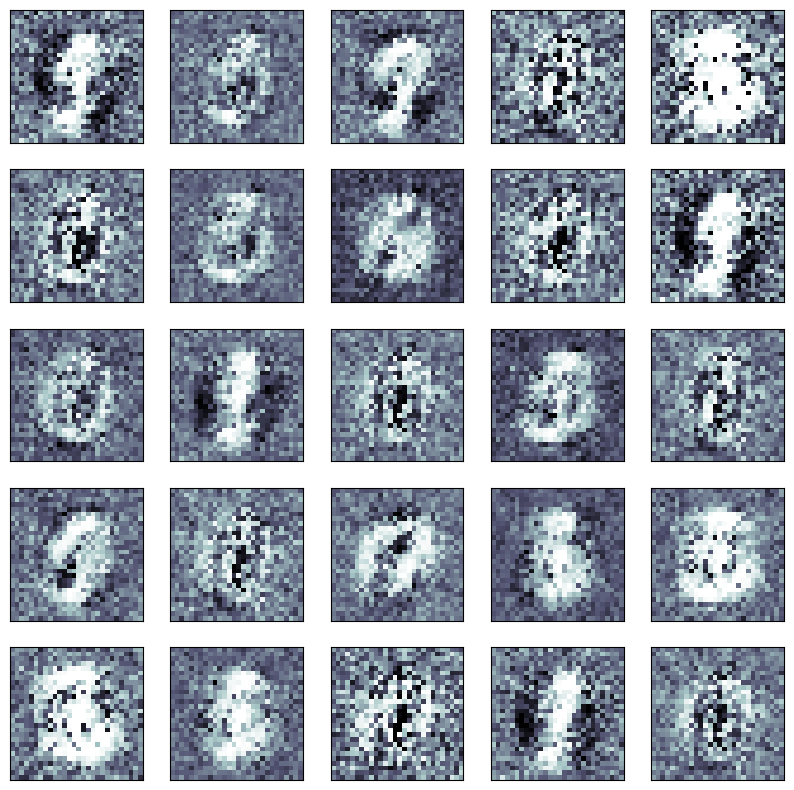

Epoch: 100/100 | Discriminator Loss: 1.5415 | Generator Loss: 0.3533 | DL > GL: True
1/1 [==============================] - 0s 17ms/step
images in dataset: 25


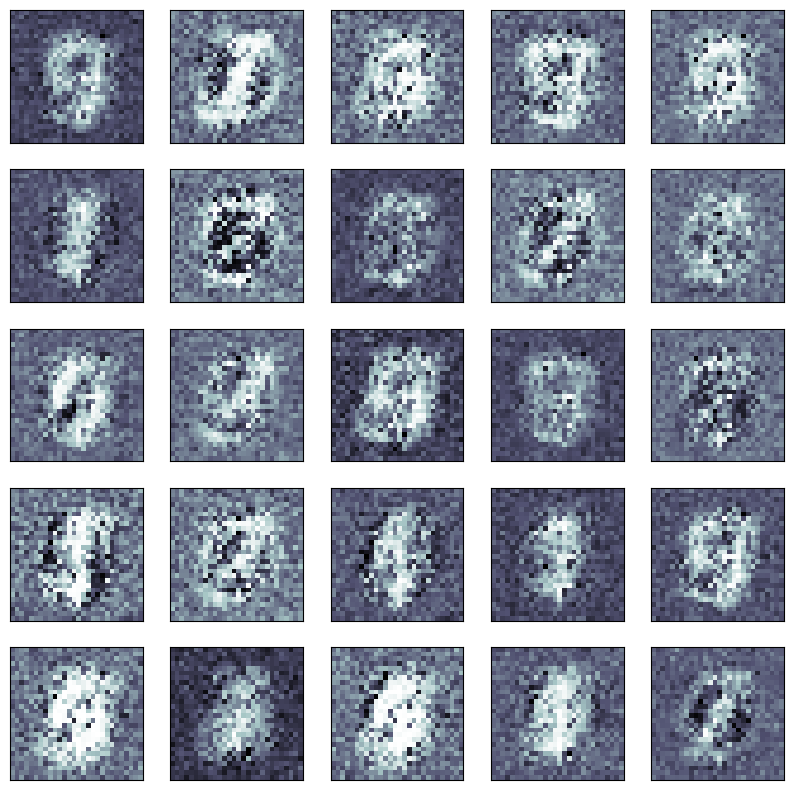

In [26]:
losses=[]
for e in range(epochs):
    for i in range(len(X_train_real)//batch_size):
        # real images
        X_batch_real=X_train_real[i*batch_size:(i+1)*batch_size]        
        # latent samples and generated letter images
        batch_latent_samples=latent_samples(batch_size,sample_size)
        X_batch_fake=generator.predict_on_batch(batch_latent_samples)        
        # train the discriminator to detect real and fake images
        trainable(discriminator,True)
        discriminator.train_on_batch(X_batch_real,y_train_real*(1.-smooth))
        discriminator.train_on_batch(X_batch_fake,y_train_fake)
        # train the generator via GAN
        trainable(discriminator,False)
        gan.train_on_batch(batch_latent_samples,y_train_real)    
    # evaluate
    X_valid_real=X_test_real[np.random.choice(len(X_test_real), 
                                              eval_size,replace=False)]    
    valid_latent_samples=latent_samples(eval_size,sample_size)
    X_valid_fake=generator.predict_on_batch(valid_latent_samples)
    d_loss=discriminator.test_on_batch(X_valid_real,y_valid_real)
    d_loss+=discriminator.test_on_batch(X_valid_fake,y_valid_fake)
    g_loss=gan.test_on_batch(valid_latent_samples,y_valid_real)     
    losses.append((d_loss,g_loss))
    st="Epoch: %d/%d | Discriminator Loss: %.4f | "+\
       "Generator Loss: %.4f | DL > GL: %s"
    if (e+1)%int(10)==0:
        print(st%((e+1,epochs,d_loss,g_loss,d_loss>g_loss)))
        if ((g_loss<.9) and (d_loss>g_loss)):
            latent_examples=latent_samples(25,sample_size)
            generated_digits=generator.predict(latent_examples)
            display_images(generated_digits)

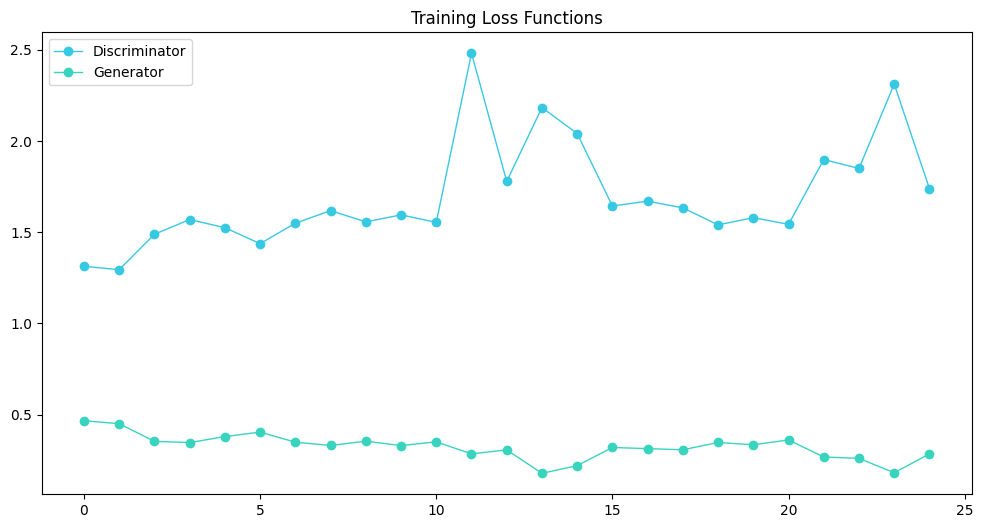

In [27]:
def display_loss(losses,n):
    indices=[i*n for i in range(len(losses)//n)]
    n_losses=np.array(losses)[indices,:]    
    plt.figure(figsize=(12,6))
    plt.plot(n_losses.T[0],'-o',c='#37c9e1',lw=1,
            label='Discriminator')
    plt.plot(n_losses.T[1],'-o',c='#39d4be',lw=1,
            label='Generator')
    plt.title("Training Loss Functions")
    plt.legend(); plt.show()
display_loss(losses,4)

1/1 [==============================] - 0s 9ms/step
images in dataset: 25


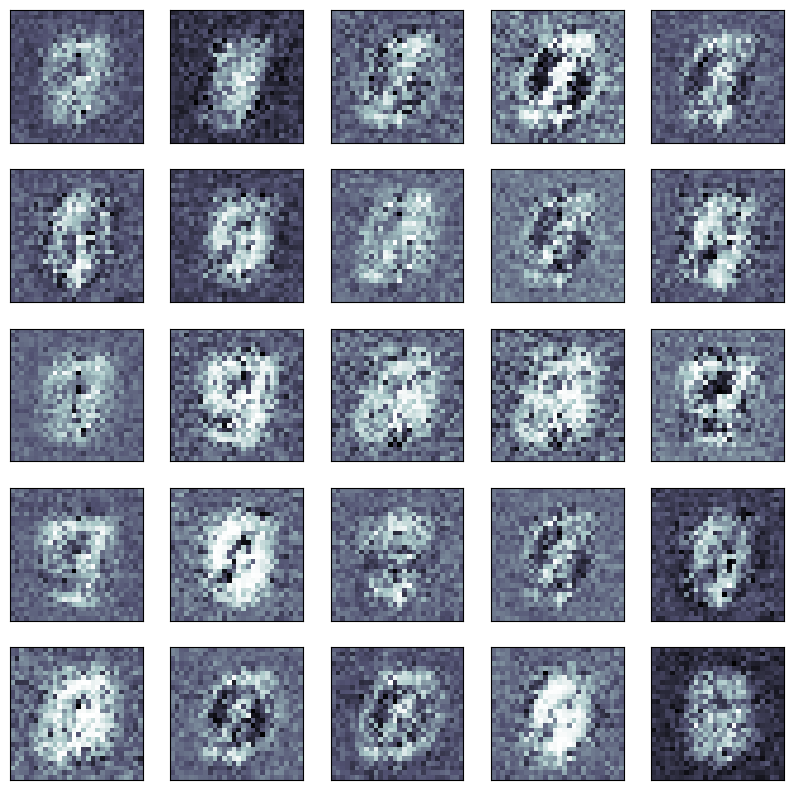

In [29]:
latent_examples=latent_samples(25,sample_size)
generated_digits=generator.predict(latent_examples)
display_images(generated_digits)